In [1]:
import json
import tqdm
import pandas as pd
import urllib.request
import cv2
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import random
import math

In [2]:
dataset_1 = pd.read_csv('final_reviewer_1.csv')
dataset_2 = pd.read_csv('final_reviewer_2.csv')

In [3]:
dataset_1.head()

Img_name                      Mask1  \
0  A053_1614934171536.png  cksx20qpx000b266faqsm8afg   
1  A053_1614934709068.png  cksx264ju000h266f2yccx5aj   
2  A065_1615971661643.png  cksx2fvs3000j266fwval6rg0   
3  A065_1615971902439.png  cksx2jaww000l266fxtegukgp   
4  A087_1617961842943.png  cksx2rxm2000n266f2cuxdv4b   

                       Mask2  
0  ckt2stelv005i266f5key9lsm  
1  ckt2stue7005k266fykrklgfc  
2  ckt2sv4b3005m266fx4mpg0r1  
3                        NaN  
4  ckt2u956d005o266falanhu1z

In [4]:
dataset_1 = dataset_1.drop_duplicates(subset='Img_name')

In [5]:
dataset_2.head()

Img_name                      Mask1
0  M071_1565687060188.png  cksxex9ru00003b6ar7bvgcoc
1  M075_1565781393764.png  cksxf4g4j000e3b6ajua625wu
2  M075_1565781696144.png  cksxfbgrq000o3b6agk3ju13o
3  M075_1565781731483.png  cksxfdkv3000s3b6a8038ihhp
4  M086_1566802065084.png  cksxfsqzd000w3b6atn3zku3u

In [6]:
dataset_2 = dataset_2.drop_duplicates(subset='Img_name')

In [7]:
def read_image(img_path, img_size, color_scale='rgb'):
    ''' Returns a numpy array of the image '''
    image = cv2.imread(img_path)
    image = Image.fromarray(image)
    image = image.resize((img_size[0], img_size[1]))
    image = np.array(image, dtype=np.uint8)

    if color_scale == 'gray':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = np.expand_dims(image, axis=2)
    elif color_scale == 'rgb':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        pass    

    return image

In [8]:
image_number = random.randint(0, len(dataset_1))
img, msk1, msk2 = dataset_1.iloc[image_number]
print(img, msk1,msk2)

MR258_1620217263207.png cktud55sy001m266iau7068cg nan


In [9]:
img_size = [1024,1024]






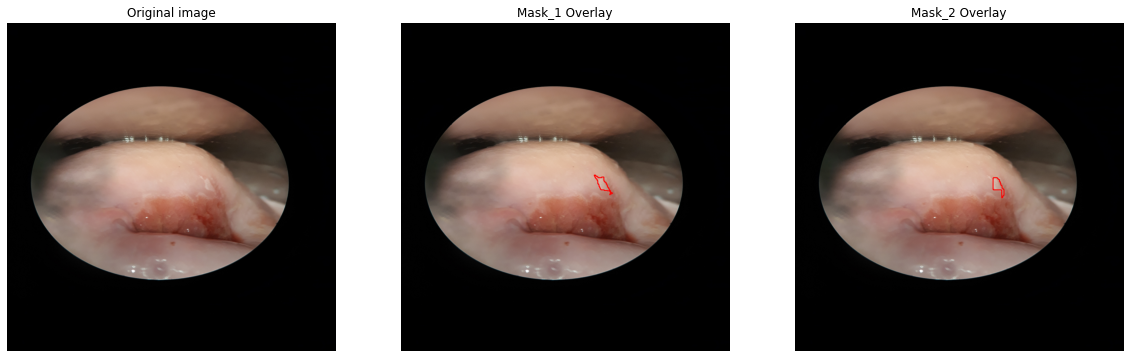

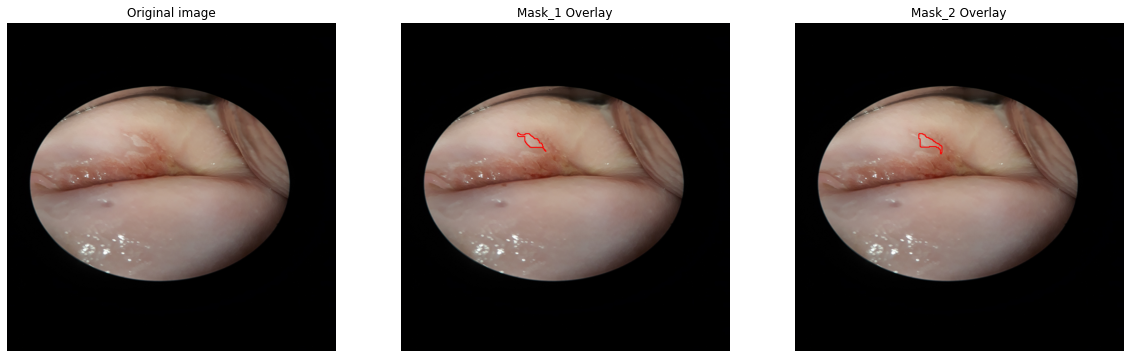

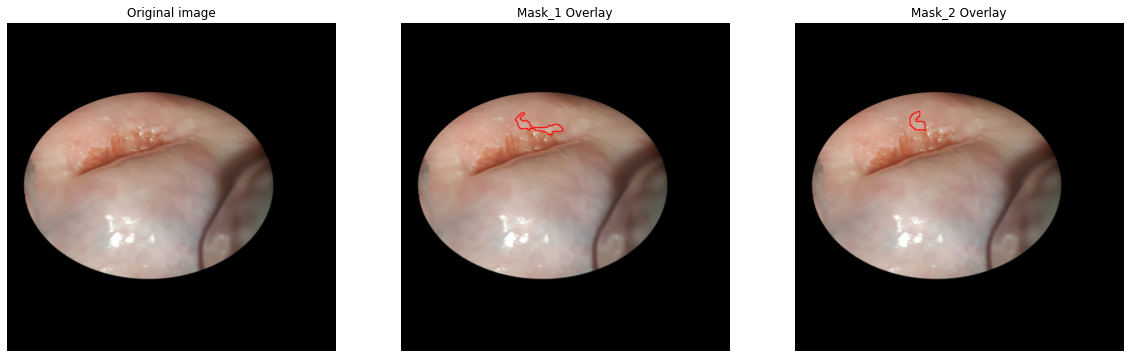

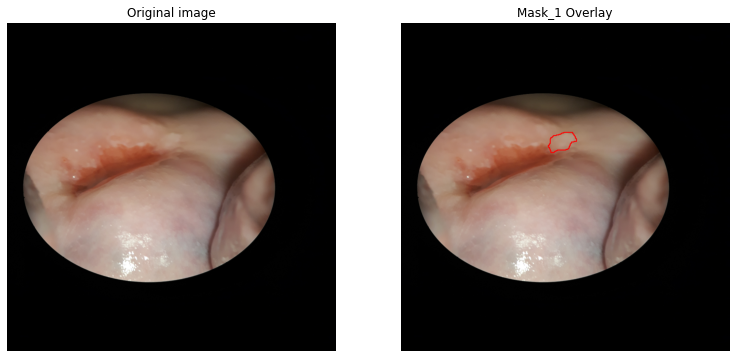

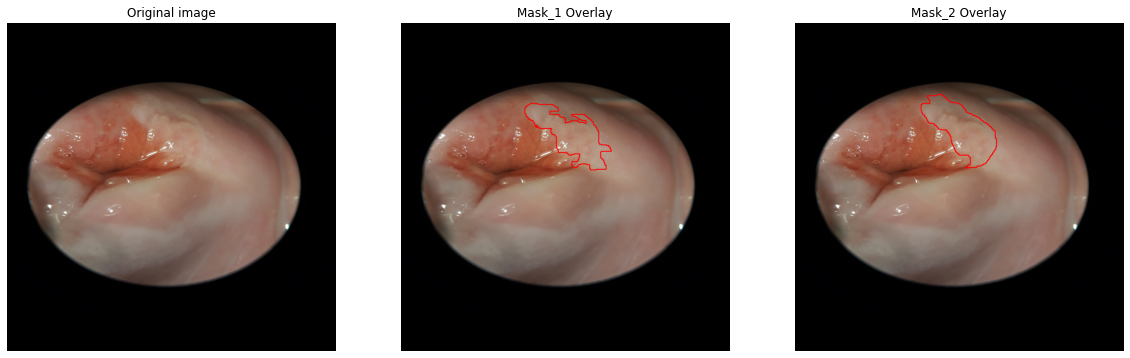

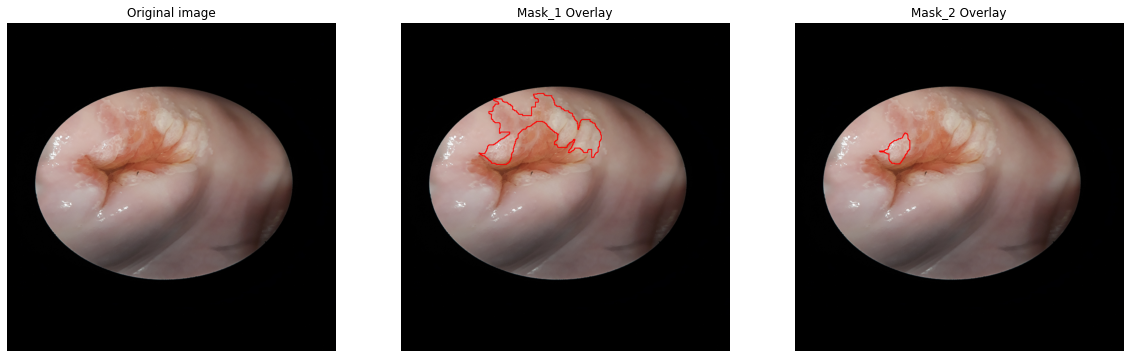

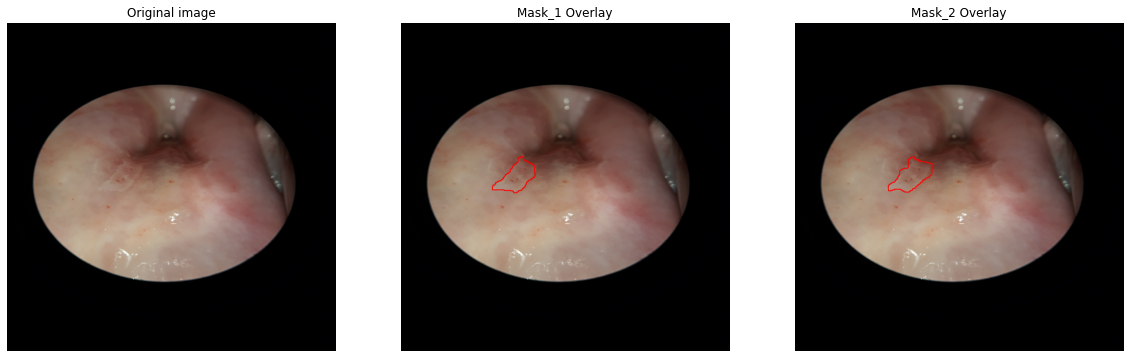

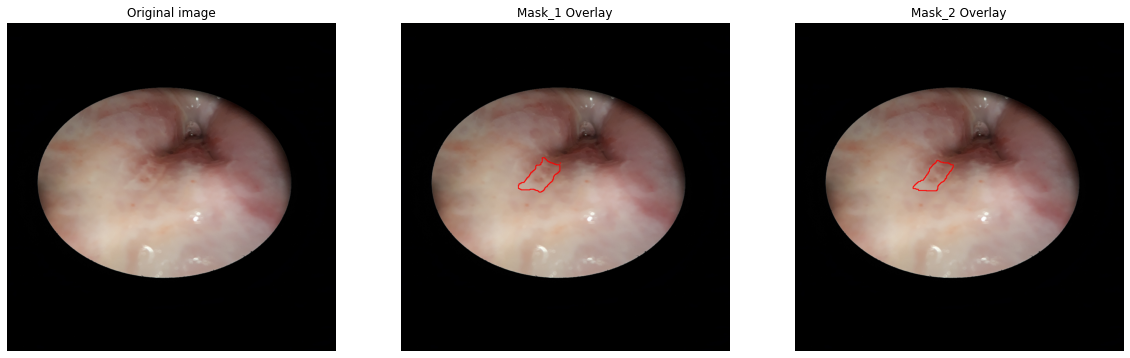

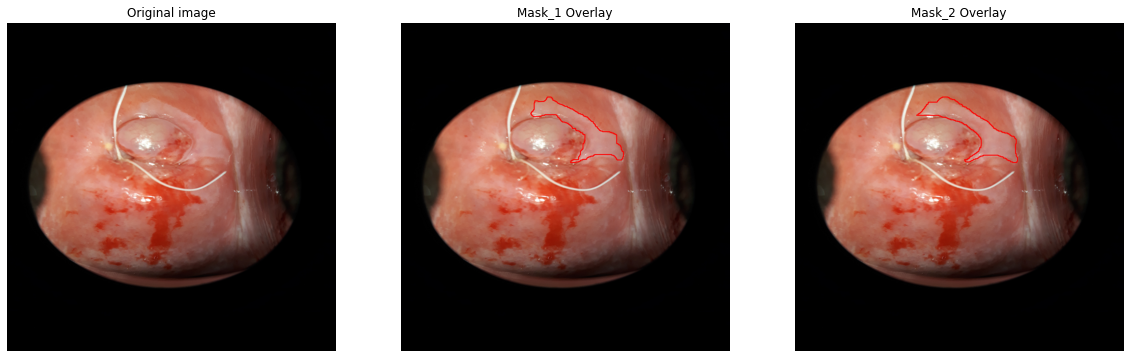

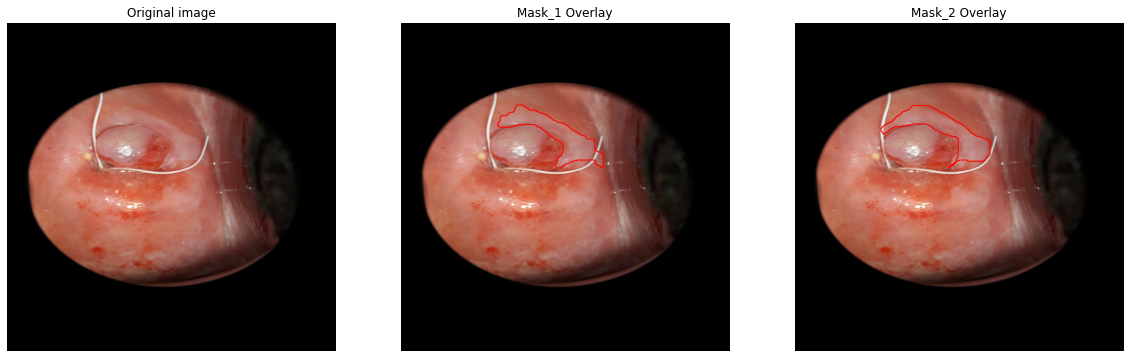

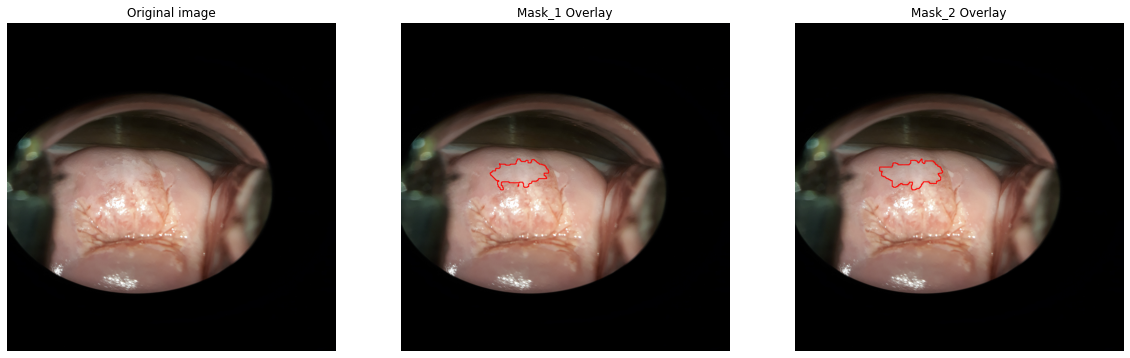

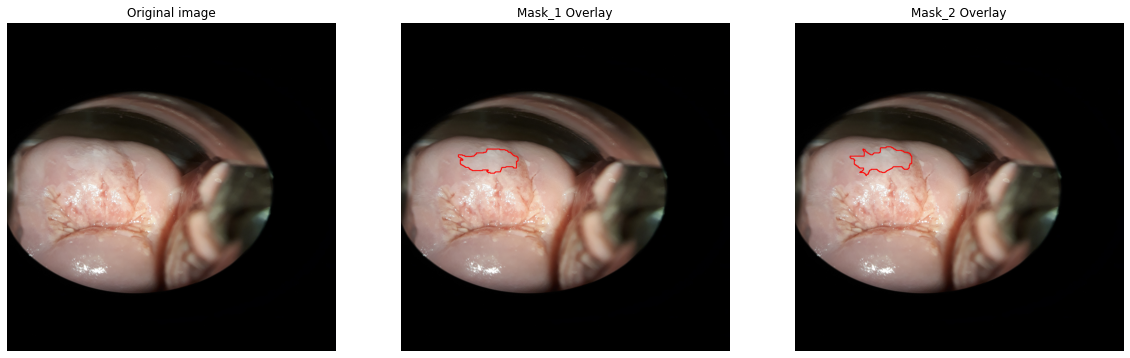

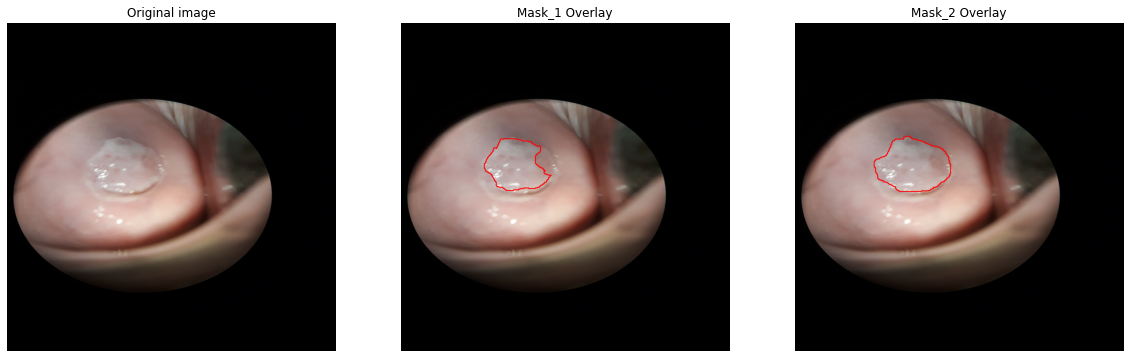

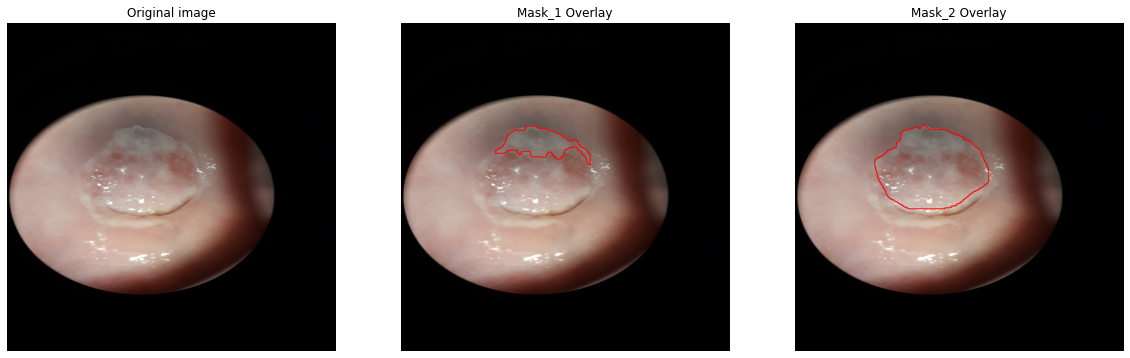

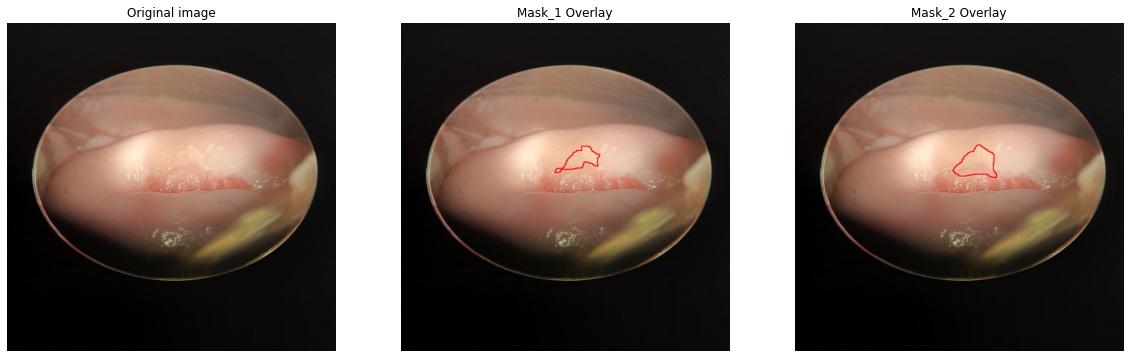

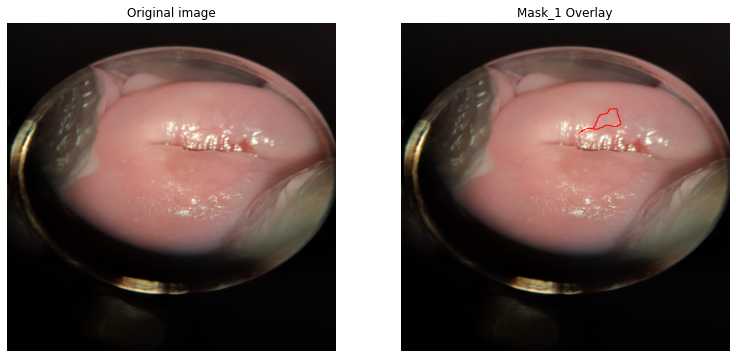

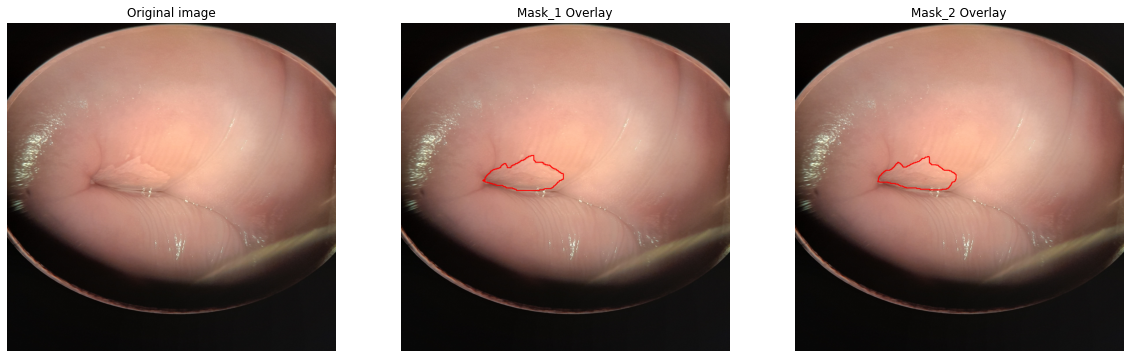

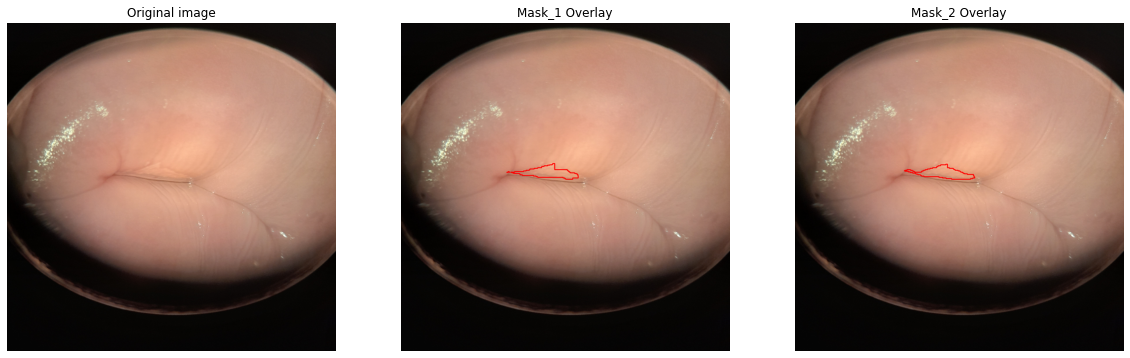

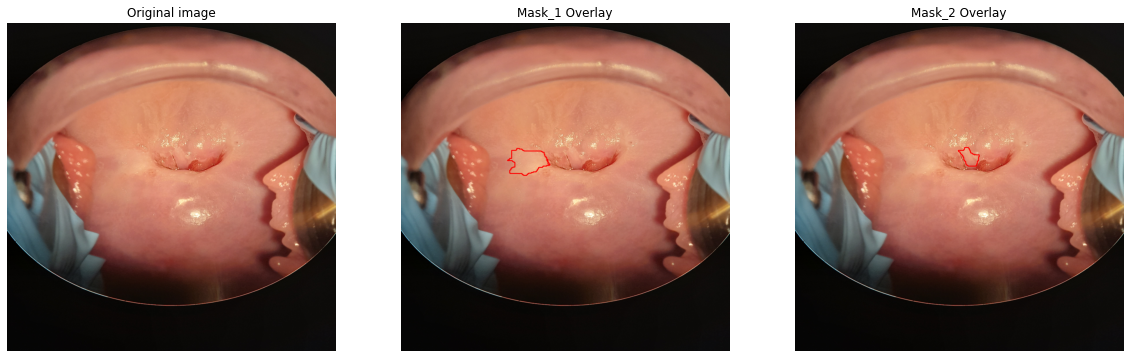

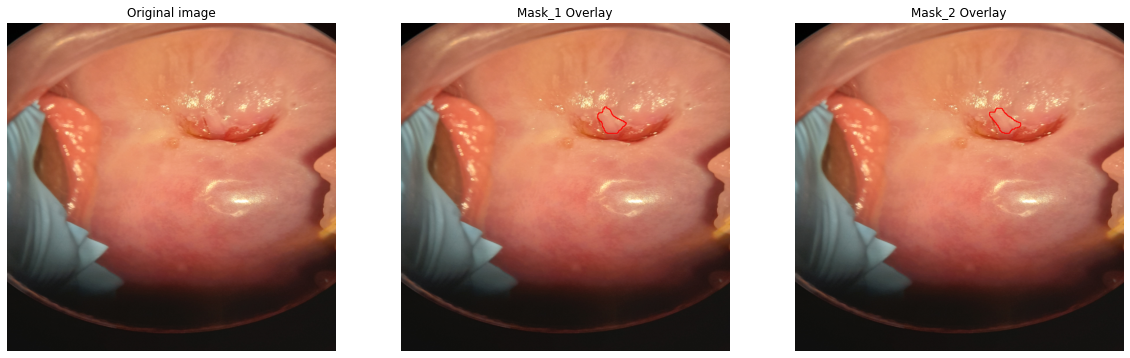

In [19]:

for i in range(20):
    plt.figure(figsize=(20, 35))
    img, msk1, msk2 = dataset_1.iloc[i]
    img_path_1 = 'Reviewer_1/original/' + img
    image = read_image(img_path_1,img_size)
    canvas1 = read_image(img_path_1,img_size)
    canvas2 = read_image(img_path_1,img_size)

    plt.subplot(131)
    plt.axis('off')
    plt.title('Original image')
    plt.imshow(image)

    msk_path_1 = 'Reviewer_1/masks/' + msk1 + '.png'
    mask = read_image(msk_path_1,img_size,color_scale='gray')


    contours, hierarchy = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    msk = cv2.drawContours(canvas1, contours, -1, (255,0,0), 2)
    plt.subplot(132)
    plt.title('Mask_1 Overlay')
    plt.imshow(canvas1, cmap='gray')
    plt.axis('off')

    if isinstance(msk2,str):
        msk_path_2 = 'Reviewer_1/masks/' + msk2 + '.png'
        mask2 = read_image(msk_path_2,img_size,color_scale='gray')


        contours, hierarchy = cv2.findContours(mask2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        msk = cv2.drawContours(canvas2, contours, -1, (255,0,0), 2)
        plt.subplot(133)
        plt.title('Mask_2 Overlay')
        plt.imshow(canvas2, cmap='gray')
        plt.axis('off')



    plt.savefig(fname='samples/sample_{}'.format(i),dpi=300)
    plt.show()


In [9]:
# import math
# isinstance(msk2,str)

In [12]:
print(len(dataset_1))
print(len(dataset_2))

354
448


In [13]:
missing = []
common = []
for i in list(dataset_2['Img_name']):
    if i not in list(dataset_1['Img_name']):
        missing.append(i)
    else:
        common.append(i)
print(len(missing))
print(len(common))

147
301


In [14]:
missing2 = []
common2 = []
for i in list(dataset_1['Img_name']):
    if i not in list(dataset_2['Img_name']):
        missing2.append(i)
    else:
        common2.append(i)
print(len(missing2))
print(len(common2))

53
301


In [15]:
dataset_2.nunique()

Img_name    448
Mask1       448
dtype: int64

In [16]:
dataset_1.nunique()

Img_name    354
Mask1       354
Mask2        33
dtype: int64

In [17]:
for d in common2:
    if d not in common:
        print(d)
        

In [23]:
d

'M646_1625656650414.png'

In [11]:
# c = common[0]
# dataset_1[dataset_1['Img_name']==c].index[0]

In [12]:
# c

In [13]:
# dataset_1.iloc[42]

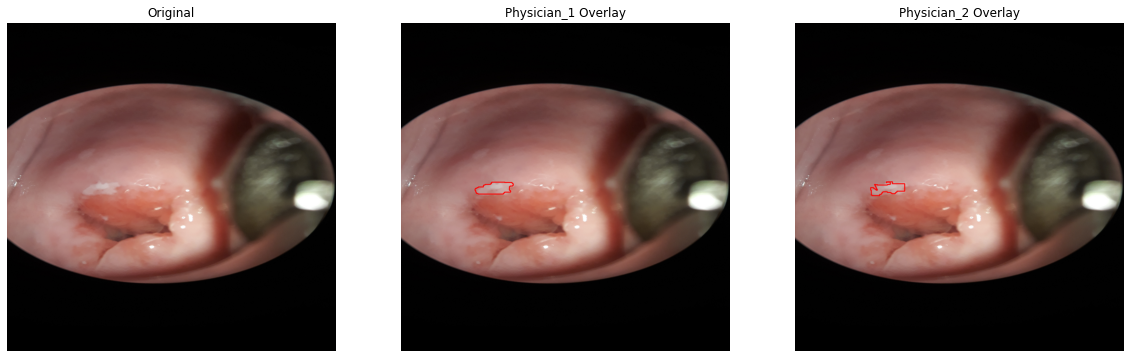

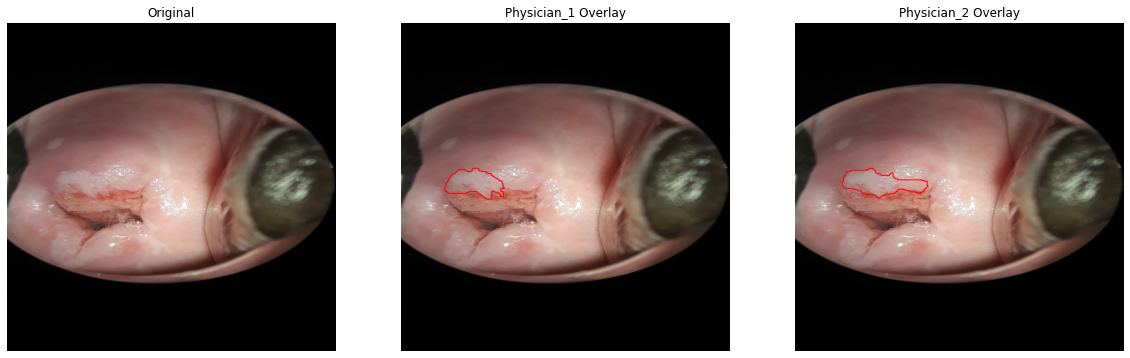

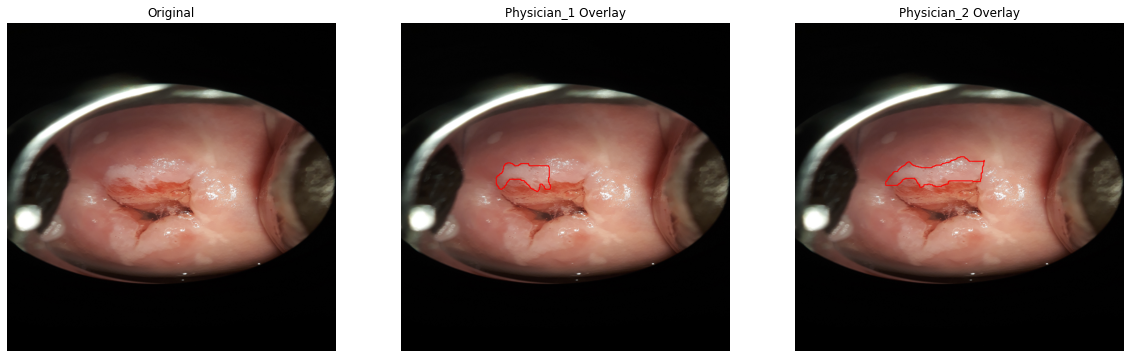

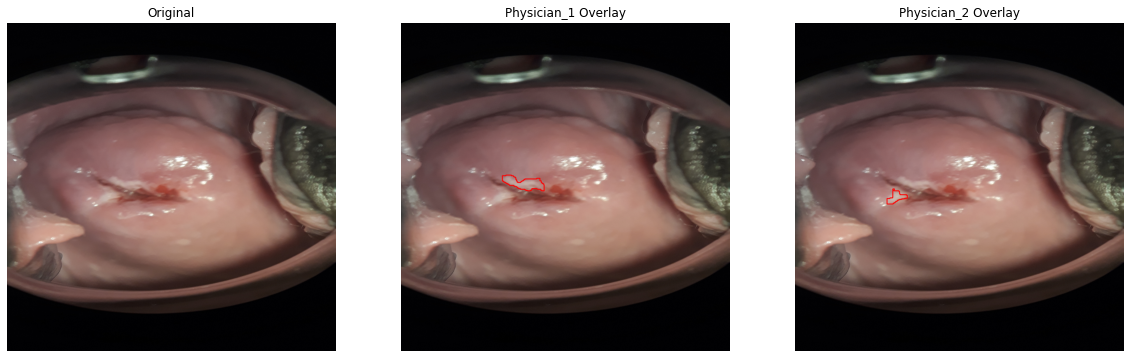

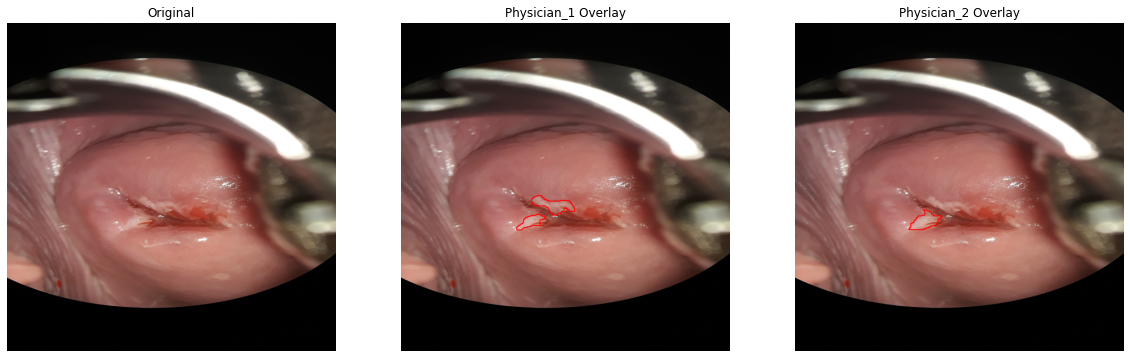

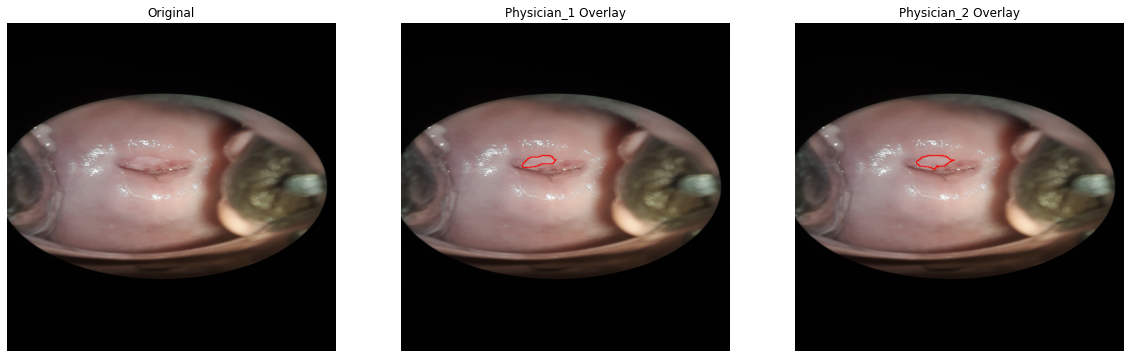

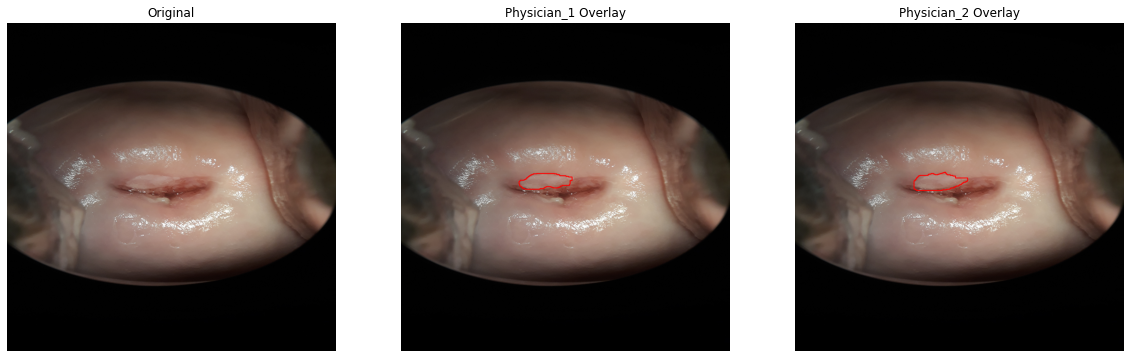

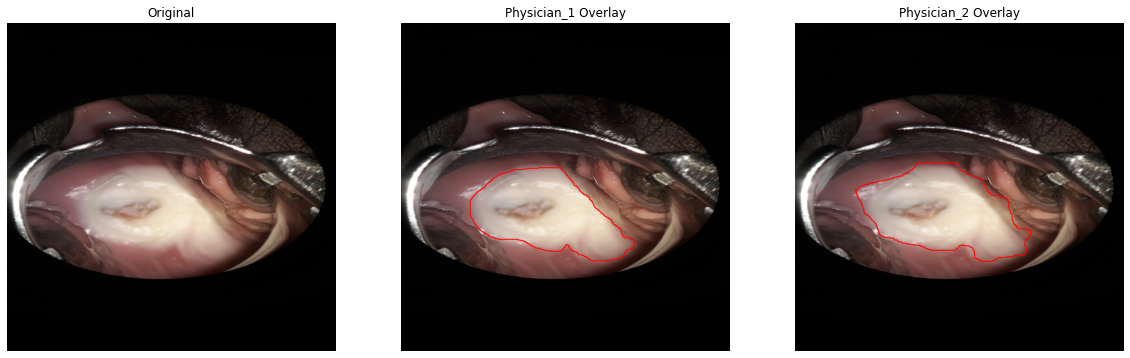

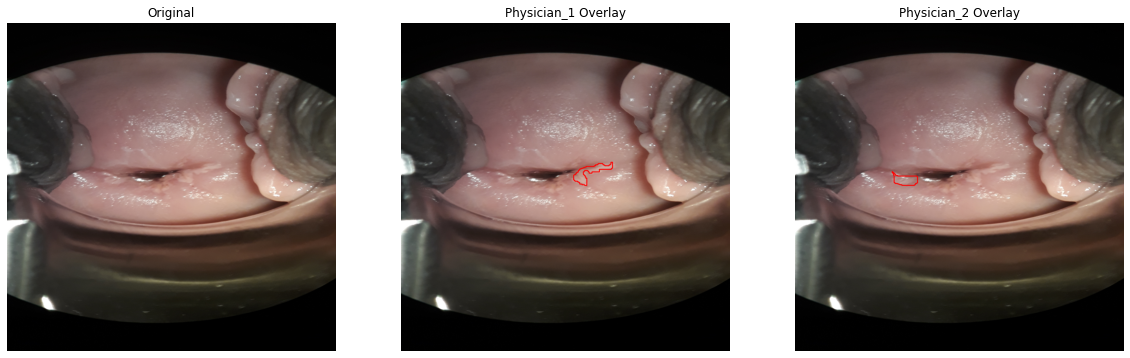

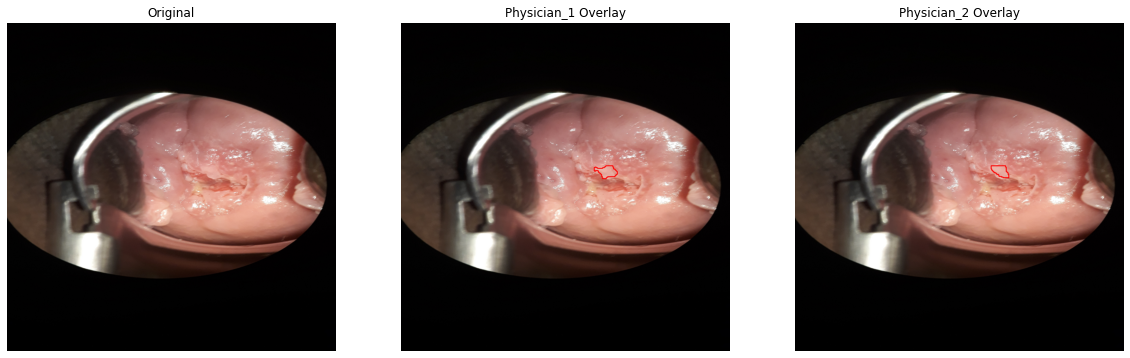

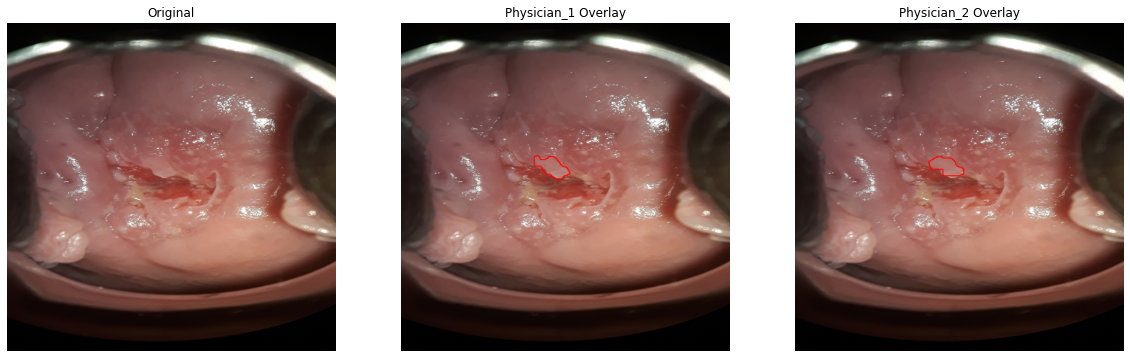

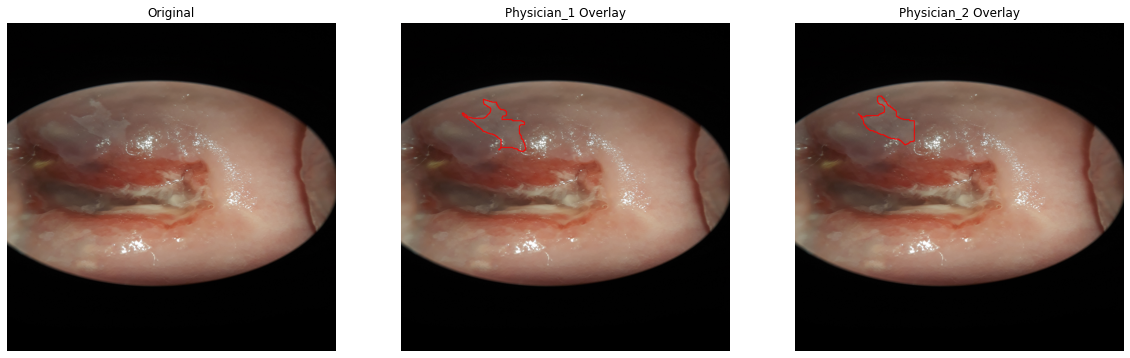

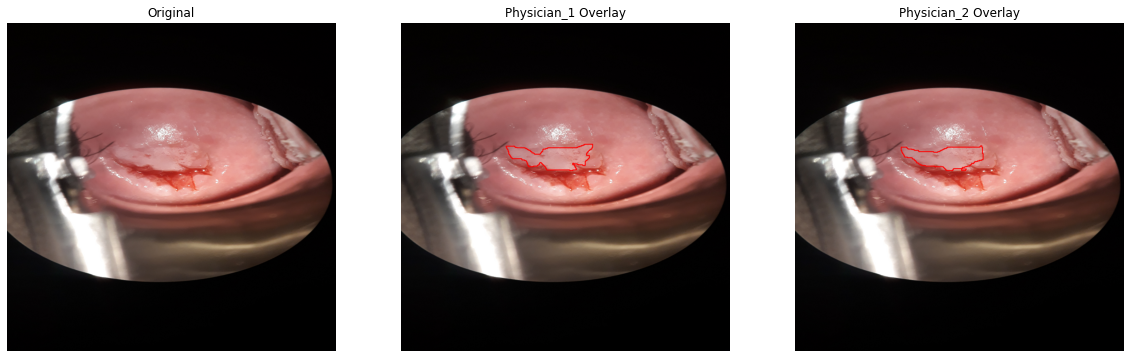

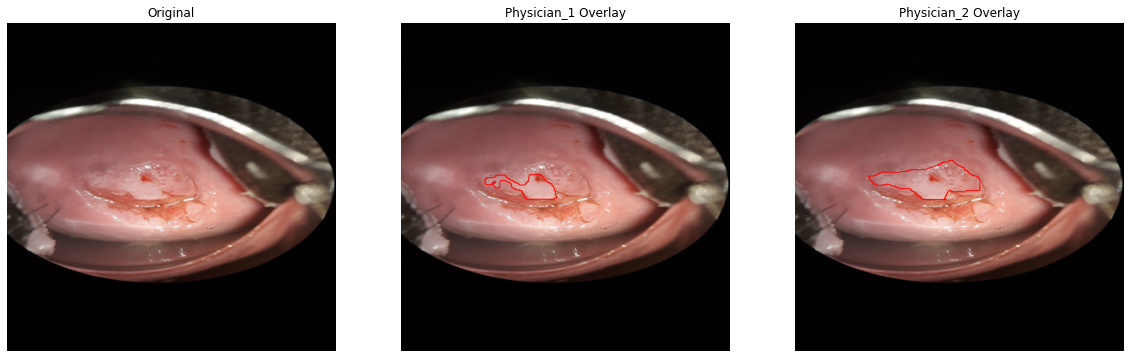

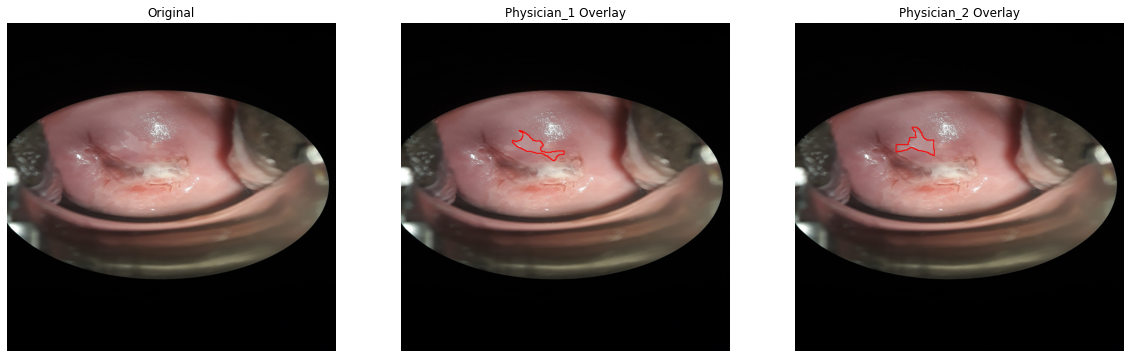

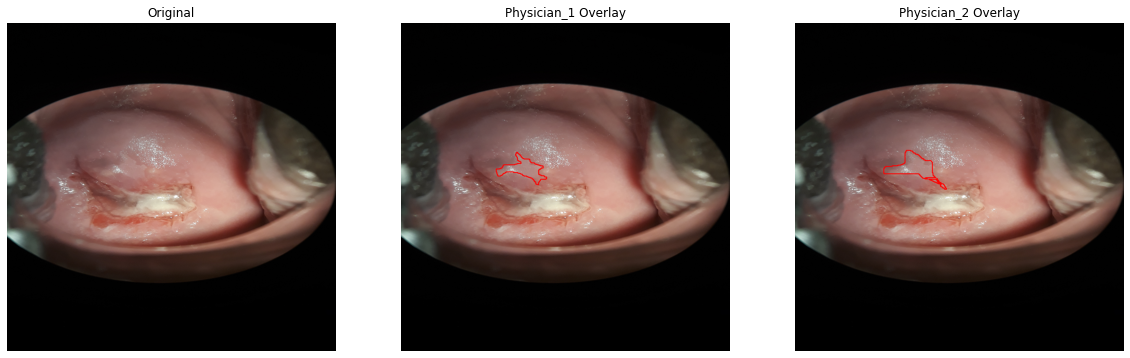

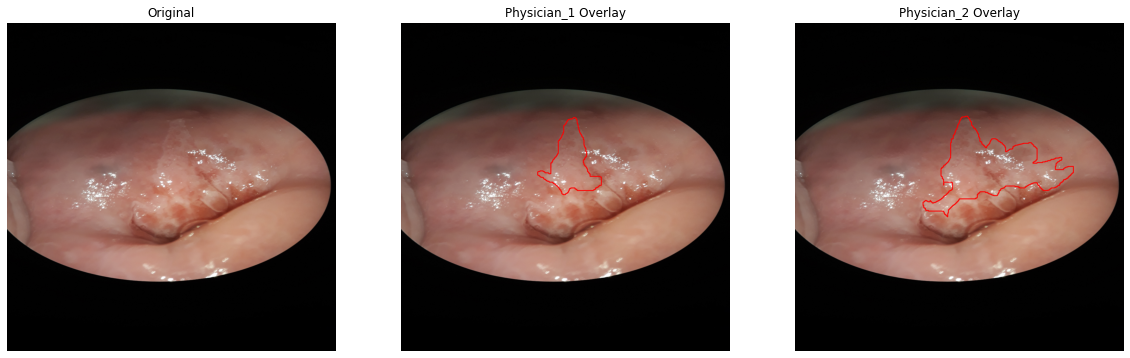

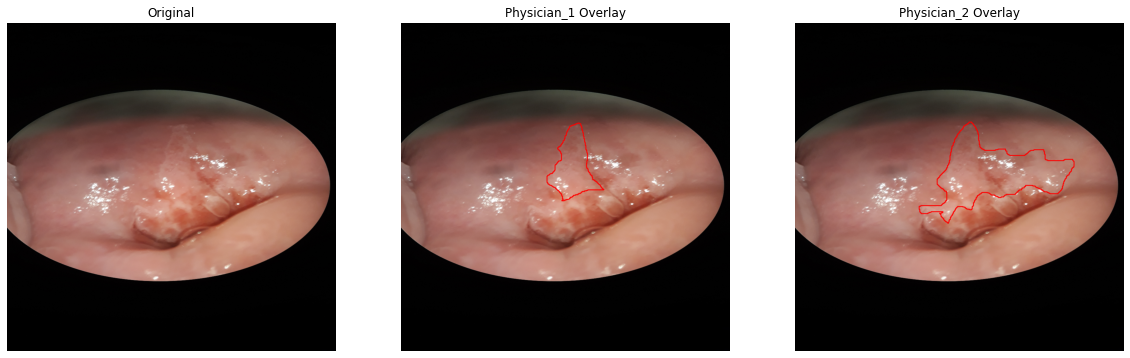

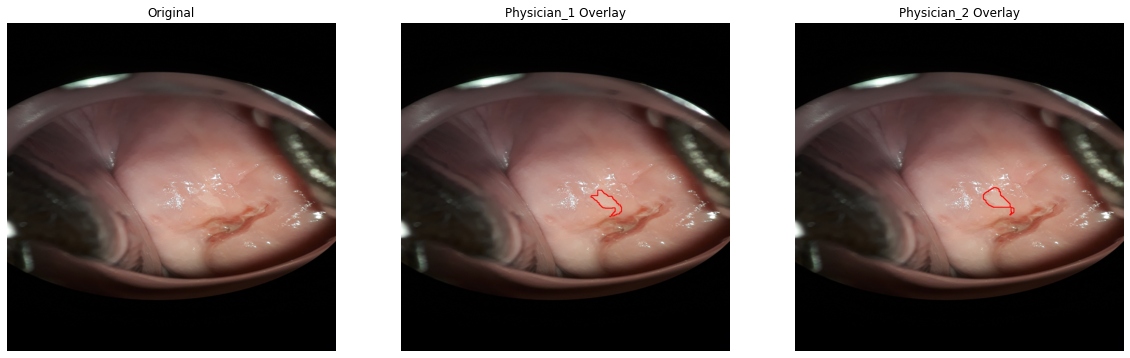

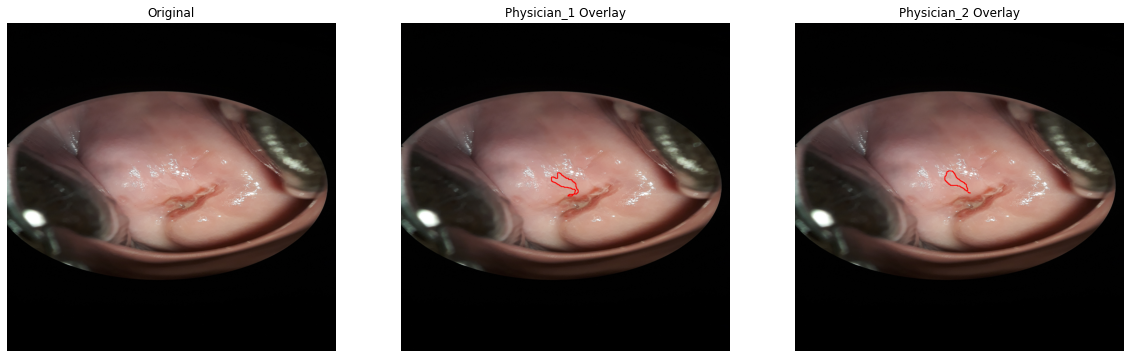

In [22]:

for i in common[:20]:
    plt.figure(figsize=(20, 35))
    ind1 = dataset_1[dataset_1['Img_name']==i].index[0]
    img, msk1, msk2 = dataset_1.iloc[ind1]
    img_path_1 = 'Reviewer_1/original/' + img
    image = read_image(img_path_1,img_size)
    canvas1 = read_image(img_path_1,img_size)
    

    plt.subplot(131)
    plt.axis('off')
    plt.title('Original')
    plt.imshow(image)

    msk_path_1 = 'Reviewer_1/masks/' + msk1 + '.png'
    mask = read_image(msk_path_1,img_size,color_scale='gray')


    contours, hierarchy = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    msk = cv2.drawContours(canvas1, contours, -1, (255,0,0), 2)
    plt.subplot(132)
    plt.title('Physician_1 Overlay')
    plt.imshow(canvas1, cmap='gray')
    plt.axis('off')

    
    ind2 = dataset_2[dataset_2['Img_name']==i].index[0]
    img, msk = dataset_2.iloc[ind2]
    rev2_img_path = 'Reviewer_2/original/' + img
    canvas2 = read_image(rev2_img_path,img_size,color_scale='rgb')


    
    
    rev2_msk_path = 'Reviewer_2/masks/' + msk + '.png'
    mask2 = read_image(rev2_msk_path,img_size,color_scale='gray')
    
    contours, hierarchy = cv2.findContours(mask2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    msk = cv2.drawContours(canvas2, contours, -1, (255,0,0), 2)
    plt.subplot(133)
    plt.title('Physician_2 Overlay')
    plt.imshow(canvas2)
    plt.axis('off')



    plt.savefig(fname='reviewer_comp/sample_{}'.format(i),dpi=300)
    plt.show()
